<a href="https://colab.research.google.com/github/sydobd/DL-PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Lets explore an example PyTorch end-to-end workflow

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predicitons and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predicitons and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [4]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

In [5]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
!nvidia-smi # returns gpu specifications when device is cuda

/bin/bash: nvidia-smi: command not found


# 1. Data (Preparing and loading)

Data can be anything... in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos (Youtube has alot of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

**Y = a + bX**

In [6]:
# Create *known* parameters
weight = 0.7 # a
bias = 0.3 # b

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds extra dimension (without unsqueeze, errors will pop up in model creation)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [8]:
# Create a train-test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(y_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

In [9]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))

  # Plot training in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot training in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

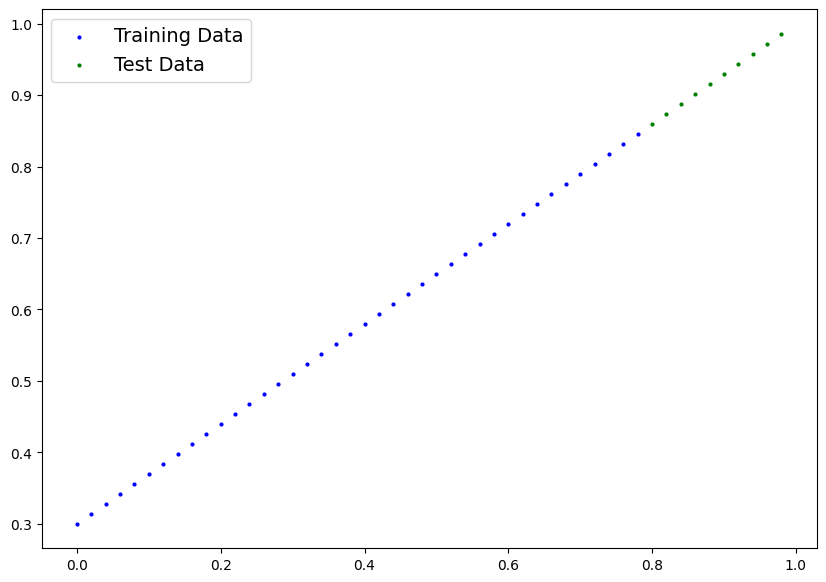

In [10]:
plot_prediction()

## 2. Build model

Our first PyTorch model!

Let's do it!

Python OOP: https://realpython.com/python3-object-oriented-programming/

nn.Module: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

What our model does:
* Start with random values (weight & loss)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?
1. Gradient descent -> https://youtu.be/IHZwWFHWa-w
2. Backpropagation -> https://youtu.be/Ilg3gGewQ5U

In [12]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch from nn.Module, Base class for all neural network modules.
  def __init__(self):
    super().__init__()
    # Method #1: Initializing random parameters
    self.weights = nn.Parameter(torch.randn(1,                  # Starts with random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # Parameter be updated via gradient descent
                                            dtype=torch.float))  # datatype=float32

    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

  # Forward method or Forward propagation to perform the computation in the model at every call
  # Any subclass of nn.Module needs to override forward()
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data, -> torch.Tensor is desired result
    return self.weights * x + self.bias # this is the linear regression formula

# We won't be necessarily defining parameters by ourselves as above,
# Method #2: Initializing layer using nn.Linear() for creating the model parameters
# self.linear_layer = nn.Linear(in_features=1,
#                                   out_features=1)

# Define the forward computation (input data x flows through nn.Linear())
# def forward(self, x: torch.Tensor) -> torch.Tensor:
#     return self.linear_layer(x)

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered as computatoinal graph)
* torch.nn.Parameter - what parameters should our model try and leearn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where optimizer is PyTorch live they will help with gradient descent (optimizes the model parameters)
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more modules - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the content of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameter or what's inside our model using `.parameters()`

In [13]:
# Create a manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is the subclass on nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Check model device
next(model_0.parameters()).device

device(type='cpu')

In [16]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_0.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_0.parameters()).device

device(type='cpu')

### Making predictions using `torch.inference_mode()`

To check out model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through out model, it's going to run through the `forward()` method

In [18]:
# Make predictions with model
# Inference mode turns off the gradient tracking because of we are not in Training, we don't need to keep track of the gradients

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

# You can do similar with torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [20]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

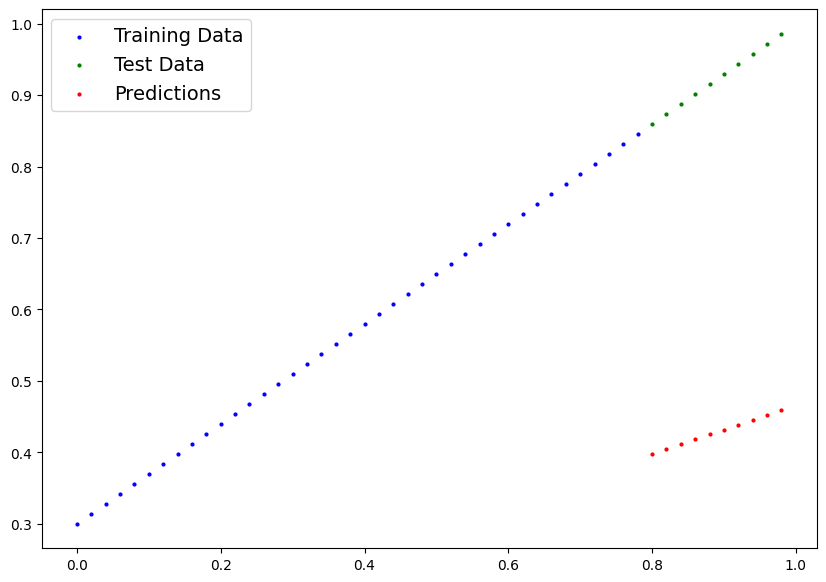

In [21]:
plot_prediction(predictions=y_preds)
# plot_prediction(predictions=y_preds.cpu()) when device is "cuda"
# We have not trained our model yet and our prediction values are far from y_test (green dots)

## 3. Train Model

The whole idea of training for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use *loss functions*.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's prediction are to the ideal outputs, lower is better. - https://pytorch.org/docs/stable/nn.html#loss-functions
  * Inside the optimizer you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter (values we set ourselves contrary to parameter) that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) in our case to improve the loss function. - https://pytorch.org/docs/stable/optim.html?highlight=optimizer#torch.optim.Optimizer

And specifically for PyTorch we need:
* A training loop
* A testing loop


In [ ]:
# Check out our's models parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn =  nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) # lr: learning rate, possibly the most important the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time)

In [ ]:
loss_fn

L1Loss()

**Q**: Which loss function and optimizer should I use?

**A**: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for regression problem (like ours), a loss function of `nn.L1loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training_loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()`) to make prediction on data -  also called forward propogation
2. Calculate the loss (compare forward pass predicitions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is hyperparameter because we've set ourself)
epochs = 100

# Put data on the available device (device agnostic code)
# Without this, error will happen (not all model/data on device)
# X_train = X_train.to(device)
# X_test = X_test.to(device)
# y_train = y_train.to(device)
# y_test = y_test.to(device)


#Track different values
epoch_count = []
train_loss_values = []
test_loss_values = []

### Training

# 0. Loop through the data
for epoch in range(epochs):

  ### Training

  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the Loss
  train_loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to parameters of the model
  train_loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop


  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout, batchnorm layers)

  with torch.inference_mode(): # turns off gradient tracking and couple of things behind the scenes
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(train_loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | Loss: {test_loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.48106518387794495 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.3463551998138428 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.21729660034179688 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.14464017748832703 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.11360953003168106 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.09919948130846024 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.08886633068323135 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.0805937647819519 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.07232122868299484 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.06473556160926819 | Test Loss: 0.06473556160926819


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

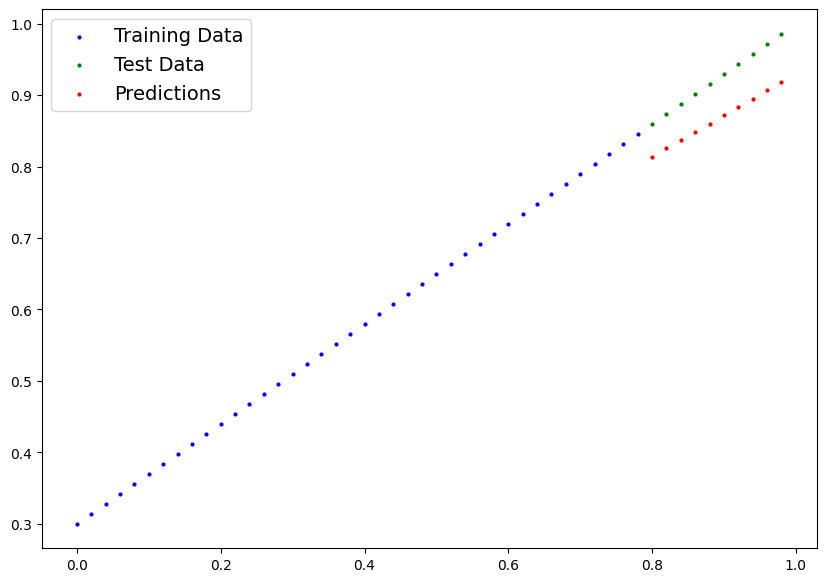

In [ ]:
plot_prediction(predictions=y_preds_new)

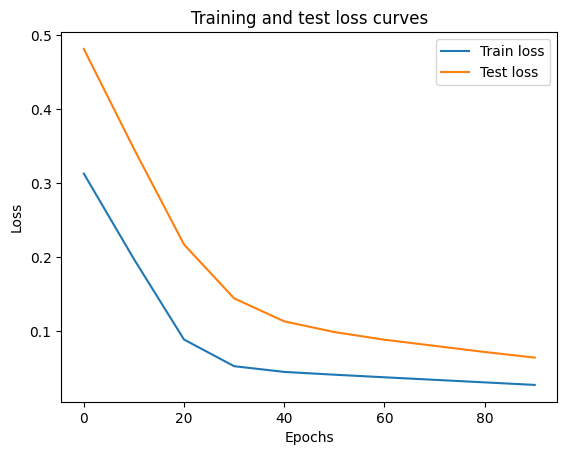

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

 ## Saving a model in PyTorch

 There are three main methods you should know about for saving and loading models in PyTorch:

 1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
 2. `torch.load()` - allows you load a saved PyTorch object.
 3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

 PyTorch save and load model - https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1199 May 30 14:37 01_pytorch_workflow_model.pth


# Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# To load in a saved state_dict we have to instatiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# loaded_model_0.to(device) putting model to device

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [ ]:
# Comparing the prediction of loaded model and model trained above
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])